## 1. Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn import preprocessing

## 2. Dataset Information

In [69]:
#Load dataset
netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [70]:
#Shape of dataset
netflix_data.shape

(8807, 12)

In [71]:
#Column names
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [72]:
#Dataset information
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [73]:
# Dataset summary
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [74]:
# Number of unique values per feature
netflix_data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [75]:
#Number of null values in dataset
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 3. Data Preprocessing 

In [76]:
#Filling in null values for dirctor, cast, and country with "Unknown"
netflix_data[['director', 'cast', 'country']] = netflix_data[['director', 'cast', 'country']].fillna('Unknown')

In [77]:
netflix_data.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [78]:
# Dropping N/A or null values
netflix_data.dropna(inplace=True)

In [79]:
netflix_data.shape

(8790, 12)

In [80]:
netflix_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [81]:
#Creating a new column 'year_added' for data analysis
year = []
for date in netflix_data['date_added']:
    year.append(int(date[-4:]))
year_added = pd.Series(year)
netflix_data['year_added'] = year_added.values

#date_added column is dropped
netflix_data = netflix_data.drop(labels='date_added', axis=1)

In [82]:
netflix_data.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [83]:
#Notice how there are no more null values and there's a new column added
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
 10  description   8790 non-null   object
 11  year_added    8790 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 892.7+ KB


## 4. Data Visualization 

### a. Growth of Netflix Over the Years 

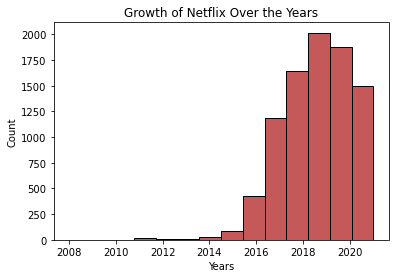

In [16]:
years = sns.histplot(data=netflix_data, x='year_added', bins=14, color='firebrick')
years.set(xlabel='Years', title='Growth of Netflix Over the Years')
plt.show()

Most movies and TV shows were added to Netflix in 2019; afterwards, it began to decline. This could have been due to the Covid-19 pandemic that hit in 2020.

### b. Distribution of Release Years 

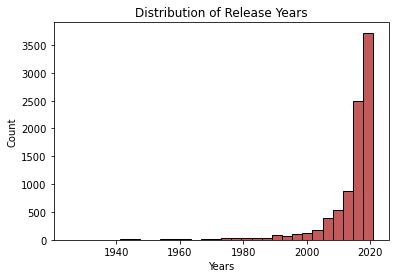

In [17]:
release_years = sns.histplot(data=netflix_data, x='release_year', bins=30, color='firebrick')
release_years.set(xlabel='Years', title='Distribution of Release Years')
plt.show()

It seems that the movies and TV shows were released mostly from 2019 and 2020. Since most shows go into production and there is a significant amount of time before they are released, shows were still able to be released during the pandemic.

### c. Types of Shows

In [18]:
count = netflix_data.groupby('type').count()['show_id']
labels = count.index
colors = ['indianred', 'mistyrose']

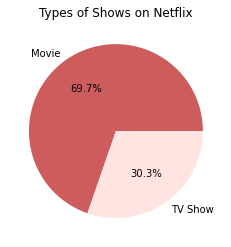

In [19]:
plt.pie(count, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Types of Shows on Netflix')
plt.setp('size=8')
plt.show()

The dataset contains listings for more movies (about 70%) than TV shows (about 30%).

### d. Origin of Shows 

In [20]:
# Viewing the top 10 countries
netflix_data['country'].value_counts().head(11)

United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [21]:
country_data = netflix_data.copy
country_data = netflix_data[netflix_data['country'].isin(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 
                                                          'Canada', 'Spain', 'France', 'Mexico', 'Egypt'])]
labels = country_data['country'].unique()
counts = country_data['country'].value_counts()
colors2 = ['firebrick', 'darksalmon', 'maroon', 'indianred', 'brown', 'salmon', 'darkred', 'tomato', 'lightcoral', 'lightsalmon']


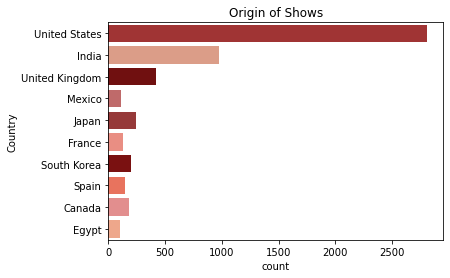

In [22]:
country = sns.countplot(data=country_data, y='country', palette=colors2)
country.set(ylabel='Country', title='Origin of Shows')
plt.show()

Most of the movies and TV shows added on Netflix were originated in the United States, with India being a distant second

### e. Top 10 Genres

In [23]:
#Viewing top 10 genres
netflix_data['listed_in'].value_counts().head(11)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Name: listed_in, dtype: int64

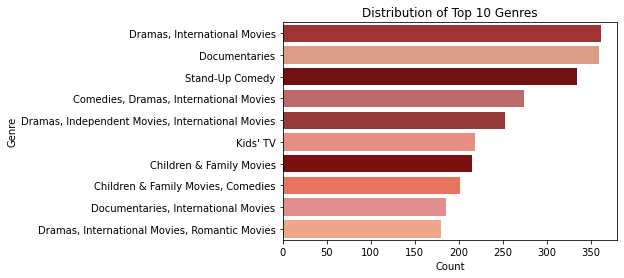

In [24]:
genres = sns.countplot(data=netflix_data, y=netflix_data['listed_in'], order=netflix_data['listed_in'].value_counts().index[:10], palette=colors2)
genres.set(xlabel='Count', ylabel='Genre', title='Distribution of Top 10 Genres')
plt.show()

The plot shows the distribution of the top 10 genres. It seems like “dramas, international movies” are the most common shows found on Netflix, even though most of the shows originated in the United States. Documentaries and stand-up comedy following after.

### f. Common Words in Movie/TV Show Descripions 

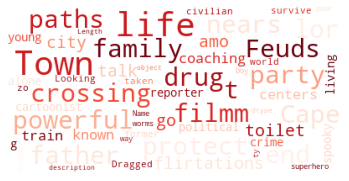

In [89]:
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=200, max_font_size=40, random_state=42, colormap='Reds').generate(str(netflix_data['description']))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

The most popular words were “family”, “life”, and “town” in movie and TV show descriptions. 

### g. Average Duration of Movies Per Year Added

In [84]:
#Creating a new DataFrame that contains the duration and year_added for just movies.
movie_durations = netflix_data.loc[netflix_data['type']=='Movie', 'duration']
movie_years = netflix_data.loc[netflix_data['type']=='Movie', 'year_added']
movie_df = pd.DataFrame({'Duration':movie_durations, 'Year Added':movie_years})

#Preprocessing the duration column for movies to extract just the integer and adding 
#the values in a new column
movies_time = []
for time in movie_df['Duration']:
    movies_time.append(int(time[:-4]))
movies_duration = pd.Series(movies_time)
movie_df['Duration Mins'] = movies_duration.values
movie_df

,Duration,Year Added,Duration Mins
0,90 min,2021,90
6,91 min,2021,91
7,125 min,2021,125
9,104 min,2021,104
12,127 min,2021,127
...,...,...,...
8801,96 min,2016,96
8802,158 min,2019,158
8804,88 min,2019,88
8805,88 min,2020,88


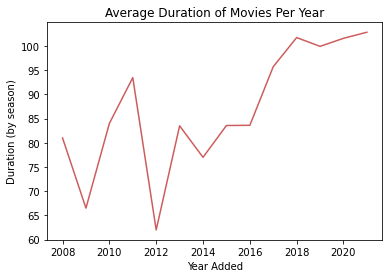

In [90]:
#Plotting the average duration per year
movie_duration_means = movie_df.groupby('Year Added').mean()
movie_duration_means.plot(title='Average Duration of Movies Per Year', xlabel='Year Added', ylabel='Duration (by season)', color='indianred', legend=False)
plt.show()

The drastic decrease in movie durations in 2012 may be caused by the lack of data of movies during that year and the film could have been a short movie. After 2018, the average duration of movies increased. This may be because people are spending more time at home during the pandemic and have more time to watch a movie.

### h. Average Duration of TV Shows Per Year Added

In [85]:
#Creating a new DataFrame that contains the duration and year_added for just TV shows.
tv_durations = netflix_data.loc[netflix_data['type']=='TV Show', 'duration']
tv_years = netflix_data.loc[netflix_data['type']=='TV Show', 'year_added']
tv_df = pd.DataFrame({'Duration':tv_durations, 'Year Added':tv_years})

#Preprocessing the duration column for TV shows to extract just the integer and 
#adding the values in a new column
tv_show_time = []
for time in tv_df['Duration']:
    if 'Seasons' in time:
        tv_show_time.append(int(time[:-8]))
    else:
        tv_show_time.append(int(time[:1]))
tv_show_duration = pd.Series(tv_show_time)
tv_df['Duration Szns'] = tv_show_duration.values
tv_df

,Duration,Year Added,Duration Szns
1,2 Seasons,2021,2
2,1 Season,2021,1
3,1 Season,2021,1
4,2 Seasons,2021,2
5,1 Season,2021,1
...,...,...,...
8795,2 Seasons,2018,2
8796,2 Seasons,2017,2
8797,3 Seasons,2018,3
8800,1 Season,2016,1


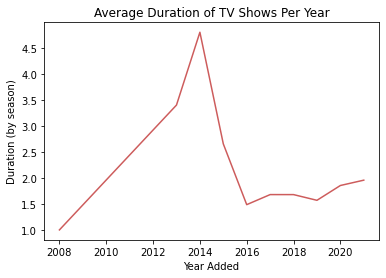

In [91]:
tv_duration_means = tv_df.groupby('Year Added').mean()
tv_duration_means.plot(kind='line', title='Average Duration of TV Shows Per Year', xlabel='Year Added', ylabel='Duration (by season)', color='indianred', legend=False)
plt.show()


2014 had the longest average duration of TV shows (at about 5 seasons). After 2014, the duration of TV shows drastically decreased to about 1-2 seasons in 2016. It seems like the duration of TV shows is starting to increase again after 2016 -- could also be because people are spending more time at home due to the pandemic so the number of seasons are increasing.

### i. Year Added vs Number of Movies/TV Shows

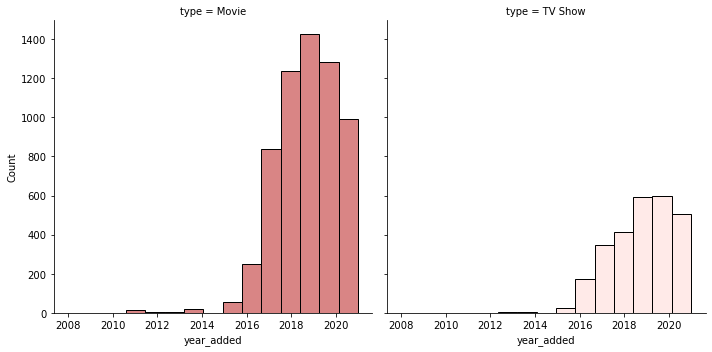

In [30]:
graph = sns.FacetGrid(netflix_data, col='type', height=5, aspect=1, hue='type', palette=colors)
graph.map(sns.histplot, 'year_added', bins=15)
plt.show()


It can be observed that both the number of movies and number of TV shows added to Netflix increased until it hit a peak between 2019 and 2020. Afterwards, the number of movies and TV shows added decreased. 

### j. Correlation Matrix

In [93]:
#Encode all categorical variables we want to observe
LabelEncoder = preprocessing.LabelEncoder()
netflix_data['type'] = LabelEncoder.fit_transform(netflix_data['type'])
netflix_data['country'] = LabelEncoder.fit_transform(netflix_data['country'])
netflix_data['listed_in'] = LabelEncoder.fit_transform(netflix_data['listed_in'])
netflix_data['duration'] = LabelEncoder.fit_transform(netflix_data['duration'])

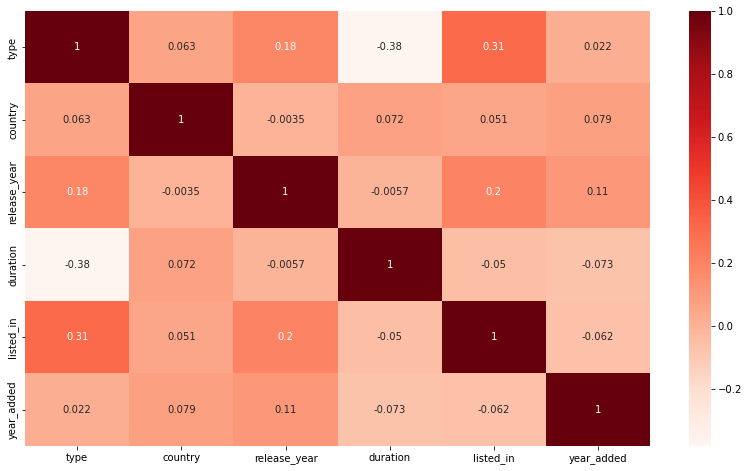

In [94]:
plt.figure(figsize=(14,8))
sns.heatmap(netflix_data.corr(), annot=True, cmap="Reds")
plt.savefig('/Users/sahitisomalraju/Documents/INFO-B 211/heatmap.png')

plt.show()

It can be observed that the type of production on Netflix (movie or TV show) is somewhat correlated to listed_in (0.31). The relsease year and listed_in seems to be somewhat correlated as well (0.2)

## 5. Curve Fitting For Prediction
How many movies/tv shows will be added to Netflix in 2022 and 2023?

### Getting Number of Movies and TV Shows per Year 

In [36]:
#Getting the counts of movies and TV shows per year added
y = netflix_data.groupby('year_added')['type'].count()
y

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: type, dtype: int64

In [37]:
#Adding the data from the previous cell into a DataFrame
df = pd.DataFrame({'year':[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021],
                  'count':[2,2,1,13,3,11,24,82,426,1185,1648,2016,1879,1498]})
df

,year,count
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,426
9,2017,1185


In [39]:
#Setting each column to a variable
x = df['year']
y = df['count']

###  Fit polynomial models up to degree 8

In [40]:
model1 = np.poly1d(np.polyfit(x, y, 1))
model2 = np.poly1d(np.polyfit(x, y, 2))
model3 = np.poly1d(np.polyfit(x, y, 3))
model4 = np.poly1d(np.polyfit(x, y, 4))
model5 = np.poly1d(np.polyfit(x, y, 5))
model6 = np.poly1d(np.polyfit(x, y, 6))
model7 = np.poly1d(np.polyfit(x, y, 7))
model8 = np.poly1d(np.polyfit(x, y, 8))

/Users/sahitisomalraju/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/sahitisomalraju/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/sahitisomalraju/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/sahitisomalraju/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


### Add fitted polynomial lines to scatterplot 

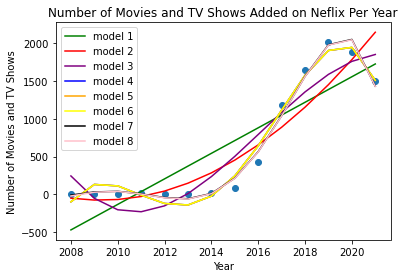

In [62]:
polyline = np.linspace(2008, 2021, 14)
plt.scatter(x, y)

plt.plot(polyline, model1(polyline), color='green', label='model 1')
plt.plot(polyline, model2(polyline), color='red', label='model 2')
plt.plot(polyline, model3(polyline), color='purple', label='model 3')
plt.plot(polyline, model4(polyline), color='blue', label='model 4')
plt.plot(polyline, model5(polyline), color='orange', label='model 5')
plt.plot(polyline, model6(polyline), color='yellow', label='model 6')
plt.plot(polyline, model7(polyline), color='black', label='model 7')
plt.plot(polyline, model8(polyline), color='pink', label='model 8')

plt.xlabel('Year')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Number of Movies and TV Shows Added on Neflix Per Year')
plt.legend()
plt.show()

As the number of degrees in the polynomial models increase, it seems that the curve is better fitted. 

### Calculate Adjusted R-squared 

In [42]:
#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#Calculate adjusted R-squared of each model
print(adjR(x, y, 1))
print(adjR(x, y, 2))
print(adjR(x, y, 3))
print(adjR(x, y, 4))
print(adjR(x, y, 5))
print(adjR(x, y, 6))
print(adjR(x, y, 7))
print(adjR(x, y, 8))

{'r_squared': 0.7322433583088357}
{'r_squared': 0.8120769465196069}
{'r_squared': 0.85533702917138}
{'r_squared': 0.9697876705248536}
{'r_squared': 0.9661371288552945}
{'r_squared': 0.9613759653733874}
{'r_squared': 0.9709423607726997}
{'r_squared': 0.9664717412818274}


/var/folders/gg/43rs151955l3gqpq_cqvf1y40000gn/T/ipykernel_64174/1300713776.py:19: RankWarning: Polyfit may be poorly conditioned
  print(adjR(x, y, 5))
/var/folders/gg/43rs151955l3gqpq_cqvf1y40000gn/T/ipykernel_64174/1300713776.py:20: RankWarning: Polyfit may be poorly conditioned
  print(adjR(x, y, 6))
/var/folders/gg/43rs151955l3gqpq_cqvf1y40000gn/T/ipykernel_64174/1300713776.py:21: RankWarning: Polyfit may be poorly conditioned
  print(adjR(x, y, 7))
/var/folders/gg/43rs151955l3gqpq_cqvf1y40000gn/T/ipykernel_64174/1300713776.py:22: RankWarning: Polyfit may be poorly conditioned
  print(adjR(x, y, 8))


From the output, it looks like the model with polynomial degree 7 has the highest adjusted R-squared value (about 0.971). This means that model 7 best fits the data compared to the other models. 

### Visualize Final Curve 

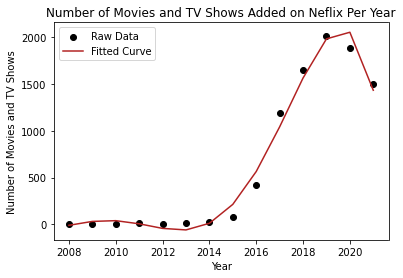

In [60]:
#Visualizing the data with model 7
plt.scatter(x,y, color='black', label='Raw Data')
plt.plot(polyline, model7(polyline), '-', color='firebrick', label='Fitted Curve')
plt.xlabel('Year')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Number of Movies and TV Shows Added on Neflix Per Year')
plt.legend()
plt.show()
plt.show()

### Equation of Curve 

In [44]:
eq = model7
print(np.poly1d(eq))

            7             6           5         4             3
-8.583e-09 x + 5.678e-05 x - 0.08462 x - 149.5 x + 3.025e+05 x
              2
 + 6.837e+08 x - 1.867e+12 x + 1.144e+15


In [63]:
#Can use the equation to predict the number of movies and tv shows added to netflix in future years 
def predict(year):
    return eq(year)
print(predict(2022))

-340.0
